# Quantitative Analysis of S&P500
### (via Alpaca Trade API)

In [7]:
# Initial imports
import os
import requests
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit
import nltk as nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import dataframe_image as dfi

%matplotlib inline

In [9]:
# API's 
API_KEY  = 'PK2WA1GYRO281K7F855F'
SECRET_KEY = 'DjgIrZMUgqsL7E95XV4WU9fi7Lc4441WkL8ylWM6'

# URL
url = 'https://data.alpaca.markets/v2'

# Rest API
rest_api = REST(API_KEY, SECRET_KEY, 'https://data.alpaca.markets/v2')

In [10]:
# Retrieve daily bar data for SPY in a dataframe 
spy_bars = rest_api.get_bars('SPY', TimeFrame.Day, '2021-01-01', '2021-03-30').df
spy_bars.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2021-01-04 05:00:00+00:00,375.30,375.45,364.82,368.79,110311999,623066,369.335676
2021-01-05 05:00:00+00:00,368.05,372.50,368.05,371.33,66435029,338927,370.390186
2021-01-06 05:00:00+00:00,369.67,376.98,369.12,373.55,108007146,575347,373.807251
2021-01-07 05:00:00+00:00,376.18,379.90,375.91,379.10,68801420,366626,378.249233
2021-01-08 05:00:00+00:00,380.63,381.49,377.10,381.26,71677308,391944,380.111637


In [38]:
# SPY bar data candlestick plot
go.Figure(data=[go.Candlestick(x=spy_bars.index,
            open=spy_bars['open'],
            high=spy_bars['high'],
            low=spy_bars['low'],
            close=spy_bars['close'])])


<AxesSubplot:title={'center':'Donald Trumps Presidency: Daily Close for S&P'}, xlabel='timestamp'>

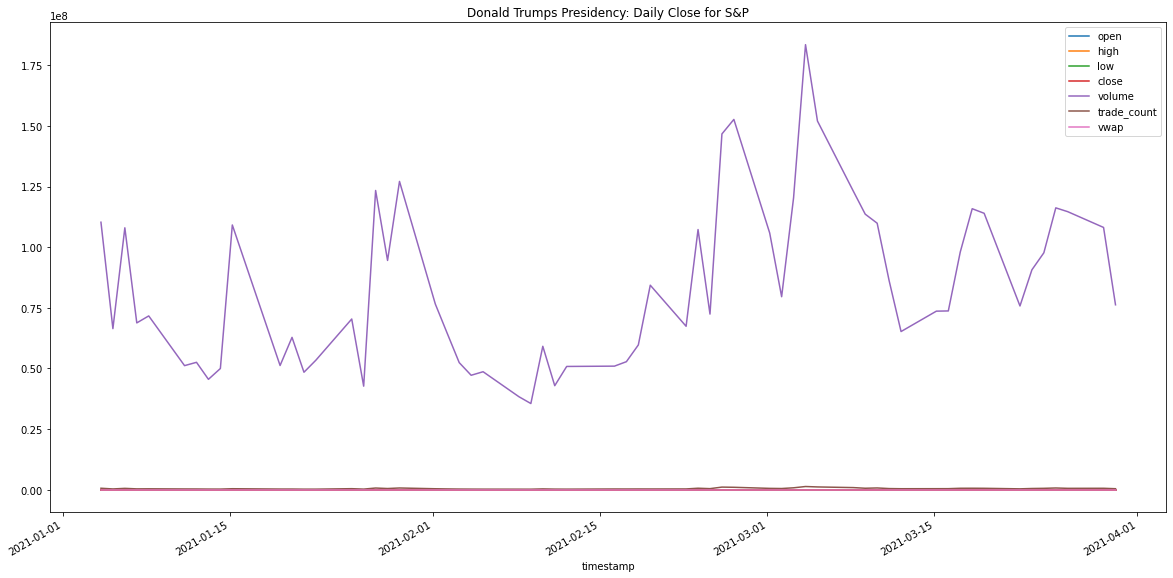

In [16]:
# Plot daily close
spy_bars.plot(figsize=(20,10), title='Donald Trumps Presidency: Daily Close for S&P')

In [11]:
# Cumulative/Daily Returns
spy_cumulative_returns = spy_bars.pct_change()
spy_cumulative_returns.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2021-01-04 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 05:00:00+00:00,-0.019318,-0.007857,0.008854,0.006887,-0.397753,-0.456034,0.002855
2021-01-06 05:00:00+00:00,0.004402,0.012027,0.002907,0.005979,0.625756,0.697554,0.009226
2021-01-07 05:00:00+00:00,0.017610,0.007746,0.018395,0.014857,-0.362992,-0.362774,0.011883
2021-01-08 05:00:00+00:00,0.011829,0.004185,0.003166,0.005698,0.041800,0.069057,0.004924


<AxesSubplot:title={'center':'Donald Trumps Presidency: Daily Returns for S&P TSX'}, xlabel='timestamp'>

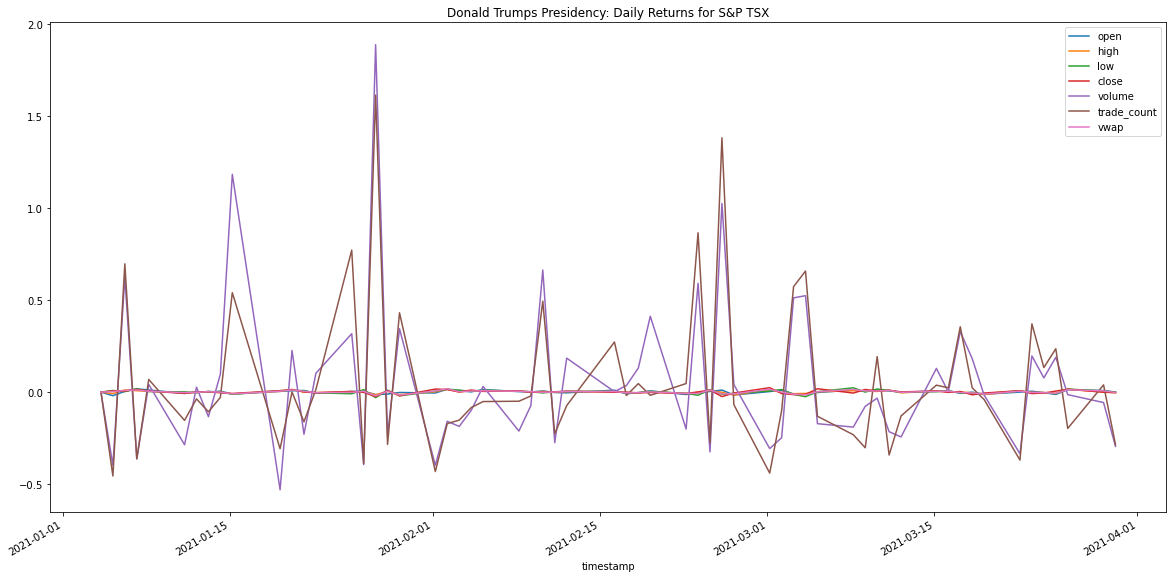

In [40]:
# Replace null values with '0'
spy_cumulative_returns = spy_cumulative_returns.fillna(0)
spy_cumulative_returns

# Plot cumulative returns
spy_cumulative_returns.plot(figsize=(20,10), title='Donald Trumps Presidency: Daily Returns for S&P TSX')

In [41]:
# Cumulative returns / candlestick plot
go.Figure(data=[go.Candlestick(x=spy_cumulative_returns.index,
            open=spy_bars['open'],
            high=spy_bars['high'],
            low=spy_bars['low'],
            close=spy_bars['close'])])

<AxesSubplot:title={'center':'Donald Trumps Presidency: Daily Returns for S&P TSX'}, xlabel='timestamp'>

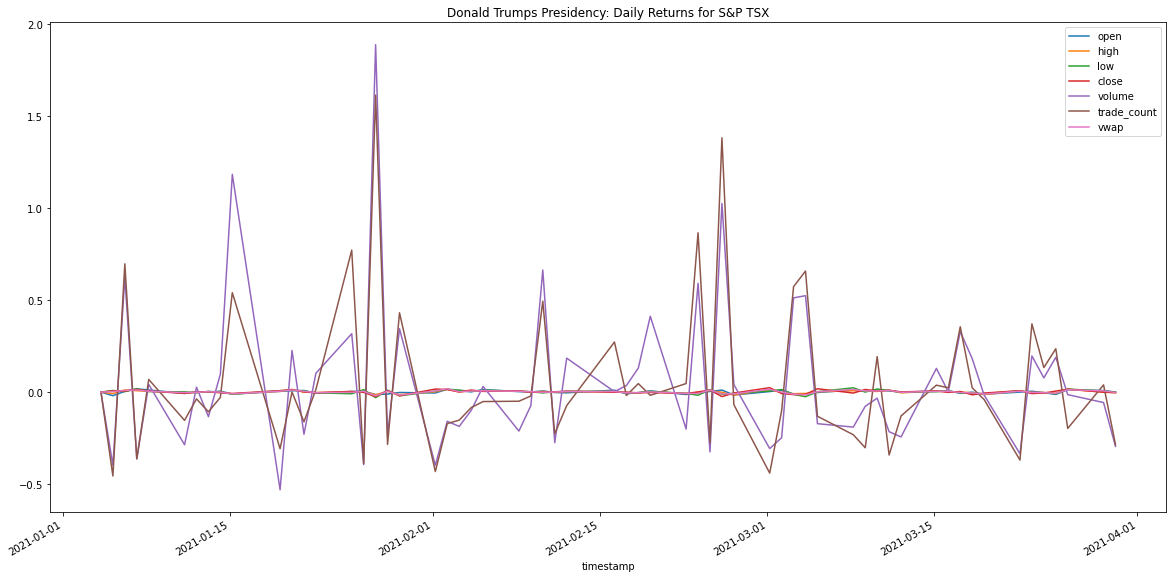

In [17]:
spy_cumulative_returns.plot(figsize=(20,10), title='Donald Trumps Presidency: Daily Returns for S&P TSX')

<AxesSubplot:title={'center':'Boxplot Representation of Portfolio Analysis'}>

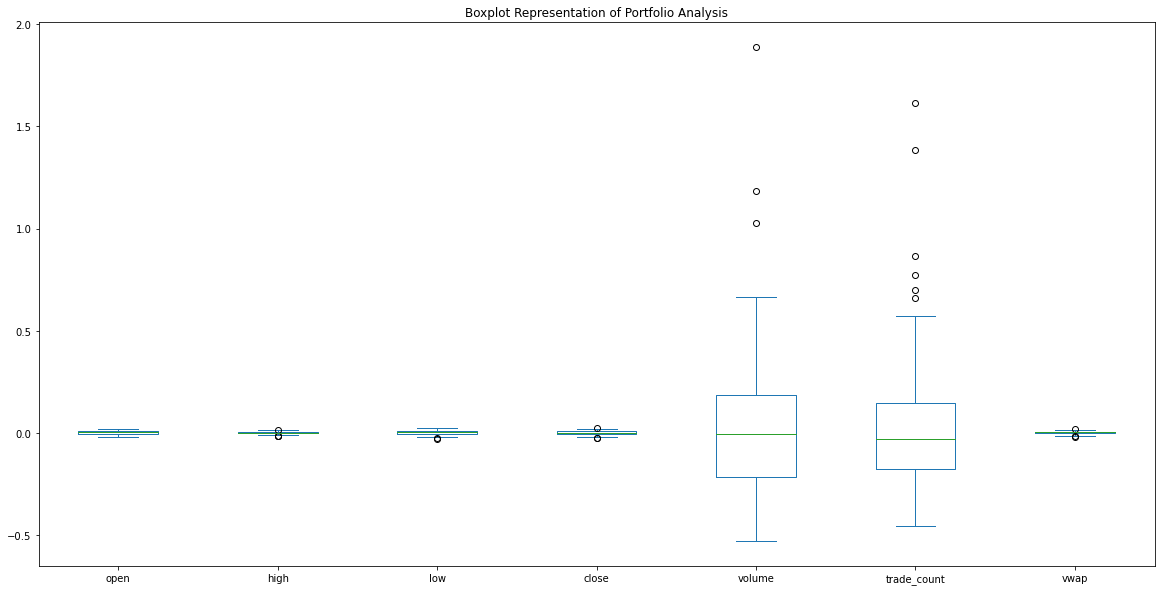

In [18]:
# Risk Analysis
## Box Plot
spy_cumulative_returns.plot.box(figsize=(20,10), title='Boxplot Representation of Portfolio Analysis')

In [19]:
# Standard deviation 
spy_cumulative_returns.std()

open           0.008491
high           0.007018
low            0.010457
close          0.009799
volume         0.417275
trade_count    0.411344
vwap           0.007858
dtype: float64

<AxesSubplot:title={'center':'Rolling Standard Deviation 21 day Window'}, xlabel='timestamp'>

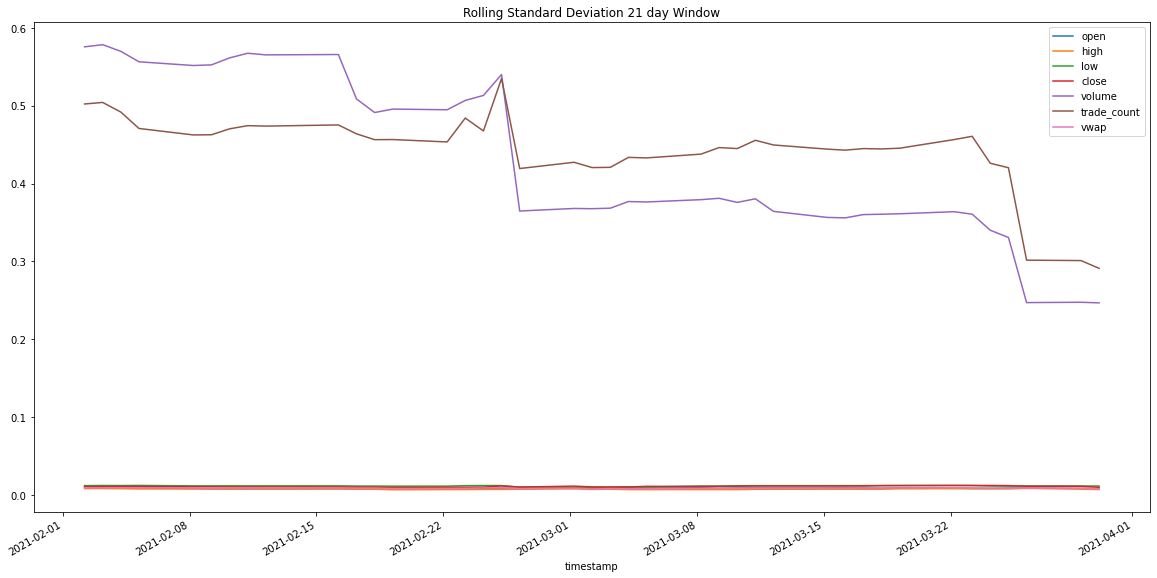

In [42]:
# Calculate the annualized standard deviation
spy_cumulative_returns.rolling(window=252).std()

# Calculate and plot rolling standard deviation 
spy_cumulative_returns.rolling(window=21).std()

# Plot the rolling standard deviation 
spy_cumulative_returns.rolling(window=21).std().plot(figsize=(20,10),title="Rolling Standard Deviation 21 day Window")

<AxesSubplot:>

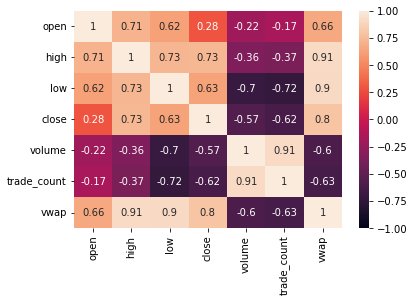

In [25]:
import seaborn as sns
# Correlation 
## Calculate the correlation using 'pearson' method
correlation_pearson = spy_cumulative_returns.corr(method='pearson')

### Display the correlation matrix
sns.heatmap(correlation_pearson, vmin=-1, vmax=1, annot=True)

In [ ]:
# Calculate and plot beta


In [29]:
# Exponentially weighted average 
# Use `ewm` to calculate the rolling window
spy_cumulative_returns.ewm(com=None, span=None, halflife=21, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0).std().plot

In [32]:
import numpy as np
# Annualized Sharpe Ratios
sharperatio = (spy_cumulative_returns.mean()*252)/(spy_cumulative_returns.std()* np.sqrt(252))
sharperatio


open           1.609743
high           2.012209
low            1.966951
close          1.912950
volume         2.169615
trade_count    2.184943
vwap           2.277835
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio Visualistation as a Bar Plot'}>

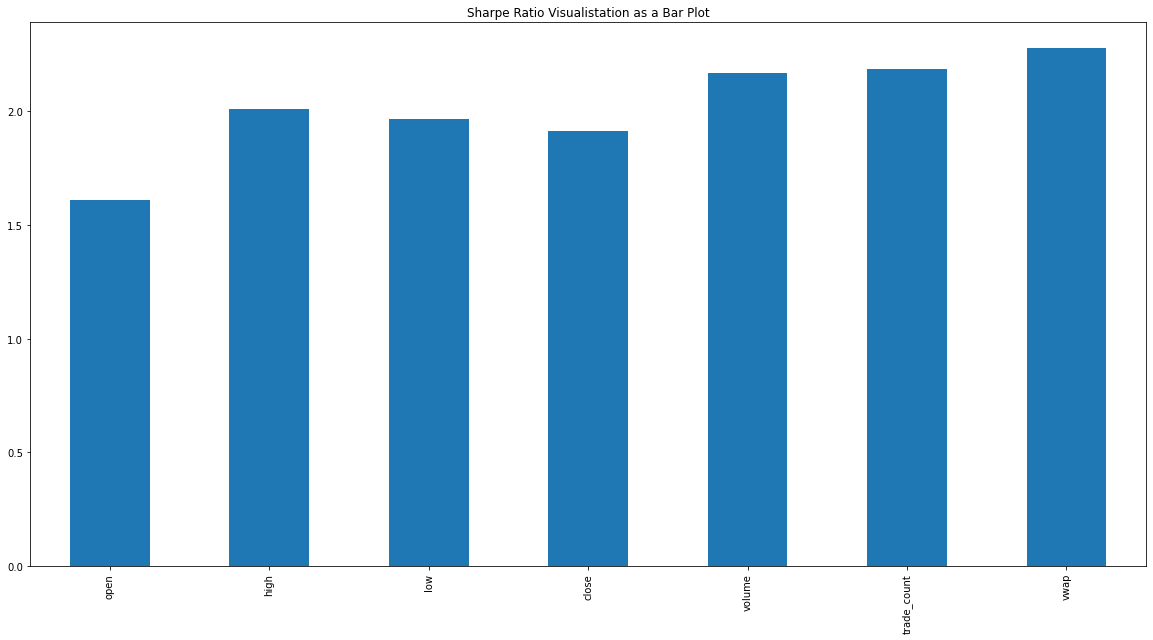

In [33]:
# Visualize the sharpe ratios as a bar plot
sharperatio.plot(kind='bar',figsize=(20,10),title='Sharpe Ratio Visualistation as a Bar Plot')

In [ ]:
# Custom portfolio ??? 

# Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

# Join your portfolio returns to the DataFrame that contains all of the portfolio returns

# Re-run the risk analysis with your portfolio to see how it compares to the others

# Simple Moving Average

In [44]:
sma_sp500 = go.Figure(data=[go.Candlestick(x=spy_bars.index,
                open=spy_bars['open'],
                high=spy_bars['high'],
                low=spy_bars['low'],
                close=spy_bars['close'])])

# Create Line Plot for SMA
sma_fig = px.line(x=sma.index, y=sma)

# Combine plots
fig = go.Figure(data=sma_sp500.data + sma_fig.data)

# Display chart
fig.show()

In [ ]:
# Custom Portfolio?





In [ ]:

# URL
url_assets = 'https://data.alpaca.markets/v2'

# Rest API
rest_api = REST(API_KEY, SECRET_KEY, 'https://data.alpaca.markets/v2')

In [47]:
assets = {
        'status':      status,
        'asset_class': asset_class,
    }

NameError: name 'status' is not defined